In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import math
from math import *
# Update the matplotlib configuration parameters:
#matplotlib.rcParams.update({'font.size': 14, 'font.family': 'serif'})
#matplotlib.rcParams.update({'font.size': 12, 'text.usetex': True})

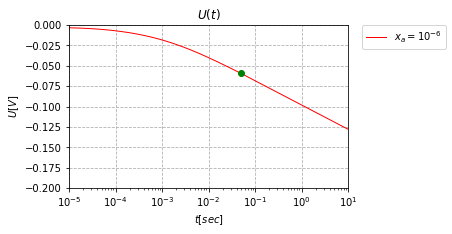

In [3]:
# Numerical solution to the initial electrode voltage decay is presented
# for the case when an electrode dipped into inert electrolyte. This is done for times 
# starting at zero - up to the time indicated by the green dot.
#
# An analytical extension is provided for times starting at the red dot

import math
from math import *
#from math import log
import numpy as np
# 1): x0=1e-6, dy=2e-7, dt=1e-18, r=0.0022, nt=5000, ny=5000, z=2, d=1e-9, xlim=[0,1e-9], ylim=[0,2.5e4]
# 2): x0=1e-6, dy=2e-7, dt=1e-18, r=0.017, nt=500, ny=500, z=2, d=1e-9, xlim=[0,1e-10], ylim=[0,2.5e4
k=1.38e-23
e=1.602e-19
z=2
T=300

d = 6e-10 #m^2/s
x0 = 1e-6
ti = 0.
t0 = 0
U0 = 0
N = 501
dy = 2e-1
dt = 1.5e-7
nt = 500
ny = 500
r = 0.018
skip = 0

A = np.zeros([N])
B = np.zeros([N])
C = np.zeros([N])
D = np.zeros([N])
E = np.zeros([N])
F = np.zeros([N])
G = np.zeros([N])
H = np.zeros([N])
I = np.zeros([N])
y = np.zeros([N])
x = np.zeros([N])
t = np.zeros([N])
BE = np.zeros([N])

U = np.zeros([N])

a = z*e*x0/k/T
b = 1./dy**2
E[1] = -2./a

#pre load E with the static field data
#for l in range (2,100):
#    E[l]=-2./a/exp((l-1)*dy)

for n in range(1,nt):
    c =d*dt
    e1 = 2.*(dy*x0)**2/c
    for i in range(2,ny):
        f = 1./2./(x0*exp((i-1)*dy))**2
        F[i] = E[i]+b*c*f*(E[1+i]-2*E[i]+E[i-1])
        F[i] = F[i]-c*f*(1.+a*exp((i-1)*dy)*E[i])*(E[i+1]-E[i-1])/2/dy
        H[i] = dy/2.*(1.+a*exp((i-1)*dy)*F[i])
        I[i] = e1*exp(2.*(i-1)*dy)
        B[i] = -2.-I[i]
        C[i] = 1.-H[i]
        if i==2:
            D[i] = (2.+2.*H[i])*2./a+(2.-I[i])*E[i]+(-1.+H[i])*E[i+1]
            BE[i] = B[i]
            G[i] = D[i]/B[i]

        if i>2:
            A[i] =1.+H[i]
            D[i] = (-1.-H[i])*E[i-1]+(2.-I[i])*E[i]+(-1.+H[i])*E[i+1]
            BE[i] = B[i]-A[i]*C[i-1]/BE[i-1]
            G[i] = (D[i]-A[i]*G[i-1])/BE[i]    
    E[ny] = G[ny]
    
    for j in range ((ny-2),1,-1):
        E[j] = G[j]-C[j]*E[j+1]/BE[j]
        U[n] = U[n]+E[j]*dy*x0*exp((j-1)*dy)
        x[j] = x0*((exp((j-1)*dy))-1.0)
 
        y[j] = x0*((exp((j-1)*dy))-1.0)
        
        #if n==(nt-1):                  
            #print ('%5d %010.3f'  %(j,E[j]))            
            #ax.plot(E, lw=2)
    #fill out the array to avoid zero data elements
    x[ny]=x[ny-2]
    x[ny-1]=x[ny-2]

    t[n] = ti  
    dt = (1+r)*dt
    ti = ti+dt 

    U[n] = U[n]+E[1]*dy*x0/2.+E[ny]*dy*x0*exp((ny-1)*dy)
    #print ('%5d %010.3f'  %(n,U[n]))
    if t[n] > 0.05:   # By setting the limit >10 there will be no analytical extension
        if skip == 0: # Setting the limit to >0.05 the analytical extension will be applied
            t0 = t[n] # (0.05 is at the end of the numerical solution)
            U0 = U[n]
            #print(n)
            skip =1
            
        U[n] = U0 -k*T/z/e*log(t[n]/t0)
        r=r*4
        #print(n)
#fill out the arrays to avoid zero data elements
U[ny]=U[ny-1]
t[ny]=t[ny-1]
#print (n)
fig, ax2 = plt.subplots(figsize=(5,3))

ax2.grid(True, linestyle='dashed')
ax2.set_xlabel(r'$t[sec]$')
ax2.set_ylabel(r'$U[V]$')
ax2.set_xlim(1e-5, 10)
ax2.set_ylim([-0.2,0])
ax2.set_title(r'$U(t)$');
ax2.semilogx(t,U, 'r',lw=1, label ='$x_a = 10^{-6}$')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
if t0>0.02:
    ax2.semilogx(t0,U0,'go' )  
    fig.savefig("numerical_analytical.pdf", dpi=300, bbox_inches="tight") 
else:
    ax2.semilogx(t[499],U[499],'go' )
    fig.savefig("numerical_only.pdf", dpi=300, bbox_inches="tight")

plt.show()
    

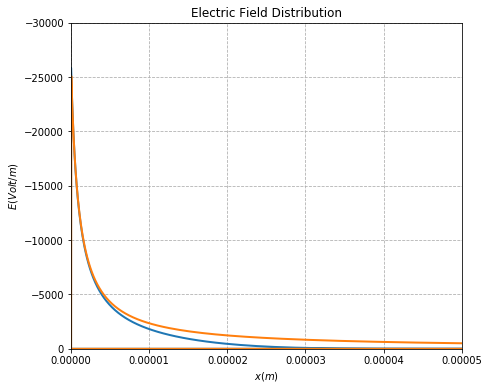

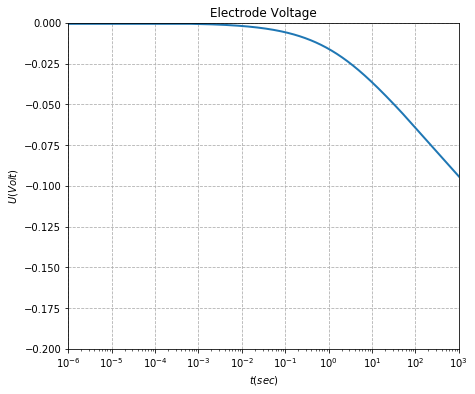

In [7]:
# Electrode dipped into Electrolyte void of its ions
# Electric field and electrode voltage are calculated
# For comparison the Electric field at time=infinity 
# is also presented
import math
from math import *
import numpy as np
#from math import log
def Crank_Nicolson(x0,dy,dt,ny,nt,z,d,r,x1,y1,xmin,y2):

    k=1.38e-23
    e=1.602e-19
    T=300    
    ti = 0.
    N = 5001
    skip =0
    A = np.zeros([N])
    B = np.zeros([N])
    C = np.zeros([N])
    D = np.zeros([N])
    E = np.zeros([N])
    E_0 = np.zeros([N])
    F = np.zeros([N])
    G = np.zeros([N])
    H = np.zeros([N])
    I = np.zeros([N])
    y = np.zeros([N])
    x = np.zeros([N])
    t = np.zeros([N])
    BE = np.zeros([N])

    U = np.zeros([N])
    #cur=-0.
    a = z*e*x0/k/T
    b = 1./dy**2
    E[1] = -2./a
    for n in range(1,nt):
        c =d*dt
        e1 = 2.*(dy*x0)**2/c
        for i in range(2,ny):
            f = 1./2./(x0*exp((i-1)*dy))**2
            F[i] = E[i]+b*c*f*(E[1+i]-2*E[i]+E[i-1])# +c*f*cur/d
            #F[i] = F[i]-c*f*(1+cur+(a*exp((i-1)*dy)*E[i]))*(E[i+1]-E[i-1])/2/dy
            F[i] = F[i]-c*f*(1+a*exp((i-1)*dy)*E[i])*(E[i+1]-E[i-1])/2/dy
            H[i] = dy/2.*(1.+a*exp((i-1)*dy)*F[i])
            I[i] = e1*exp(2.*(i-1)*dy)
            B[i] = -2.-I[i]
            C[i] = 1.-H[i]
            # The efficient L Thomas Tridiagonal matrix algorithm is used here
            if i==2: #Boundary Condition
                D[i] = (2.+2.*H[i])*2./a+(2.-I[i])*E[i]+(-1.+H[i])*E[i+1]
                BE[i] = B[i]
                G[i] = D[i]/B[i]

            if i>2:
                A[i] =1.+H[i]
                D[i] = (-1.-H[i])*E[i-1]+(2.-I[i])*E[i]+(-1.+H[i])*E[i+1]
                BE[i] = B[i]-A[i]*C[i-1]/BE[i-1]
                G[i] = (D[i]-A[i]*G[i-1])/BE[i]    
        E[ny] = G[ny]

        for j in range ((ny-2),1,-1): 
            E[j] = G[j]-C[j]*E[j+1]/BE[j]
            U[n] = U[n]+E[j]*dy*x0*exp((j-1)*dy)
            x[j] = x0*((exp((j-1)*dy))-1.0)
            E_0[j] =-2*k*T/z/e/(x[j]+x0)# Here we calculate the field at t=inf

        #fill out the array to avoid zero data elements
        E_0[ny]=E_0[ny-2]
        E_0[ny-1]=E_0[ny-2]
        x[ny]=x[ny-3]
        x[ny-1]=x[ny-3]
        x[ny-2]=x[ny-3]
    
        ti = ti+dt 
        t[n] = ti        

        #if n==(nt-1): 
            #print ('%010.3g'  %(ti*nt))
        dt = (1+r)*dt
        U[n] = U[n]+E[1]*dy*x0/2.+E[ny]*dy*x0*exp((ny-1)*dy) 
        #print(n,U[n])

    ti=0.
    for n in range(1,nt):
        ti = ti+dt   
        t[n]=ti
        dt = (1+r)*dt
        if U[n] < -0.055:
            if skip == 0:
                u0 = U[n]
                t0 = t[n]
                skip = 1
            U[n] = u0-k*T/z/e*log(t[n]/t0)   # Here we use the late time analytical expansion
            r=r*4            
            
    fig, ax = plt.subplots(figsize=(7,6))
    fig, ax2 = plt.subplots(figsize=(7,6))

    ax.grid(True, linestyle='dashed')
    ax.set_xlabel(r'$x(m)$')
    ax.set_ylabel(r'$E(Volt/m)$')
    ax.set_xlim([0, x1])
    ax.set_ylim([0,y1])
    ax.set_title('Electric Field Distribution');
    ax.plot(x,E, lw=2)
    ax.plot(x, E_0, lw=2)

    ax2.grid(True, linestyle='dashed')
    ax2.set_xlabel(r'$t(sec)$')
    ax2.set_ylabel(r'$U(Volt)$')
    ax2.set_xlim(xmin, 1000.)
    ax2.set_ylim([y2,0])
    ax2.set_title('Electrode Voltage');
    ax2.semilogx(t,U, lw=2)

    plt.show()            
    
#Crank_Nicolson(x0=1e-10,dy=1e-2,dt=1e-13,ny=500,nt=500,z=2,d=2e-9,r=0.008, x1=3e-9,y1=-3e8,xmin=1e-6,y2=0.3)   
#Crank_Nicolson(x0=1e-9,dy=1e-2,dt=1e-11,ny=500,nt=500,z=2,d=2e-9,r=0.008, x1=3e-8,y1=-3e7,xmin=1e-6,y2=0.3)
#Crank_Nicolson(x0=1e-8,dy=1e-2,dt=1e-9,ny=500,nt=500,z=2,d=2e-9,r=0.008, x1=3e-7,y1=-3e6,xmin=1e-6,y2=-0.3)
#Crank_Nicolson(x0=1e-7,dy=1e-2,dt=1e-7,ny=500,nt=500,z=2,d=2e-9,r=0.002, x1=3e-6,y1=-3e5,xmin=1e-6,y2=-0.3)
Crank_Nicolson(x0=1e-6,dy=3e-2,dt=1.5e-7,ny=500,nt=500,z=2,d=2e-9,r=0.017, x1=5e-5,y1=-3e4,xmin=1e-6,y2=-0.2)
#Crank_Nicolson(x0=1e-5,dy=1e-2,dt=1e-3,ny=500,nt=500,z=2,d=2e-9,r=0.008, x1=3e-4,y1=-3e3,xmin=1e-6,y2=-0.3)

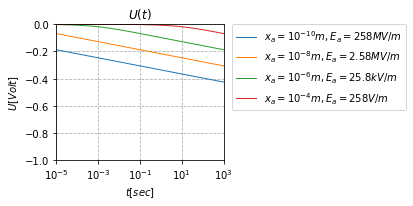

In [10]:
# Anodic Electrode voltage derived for a range of x0 parameters
#
import math
from math import *
import numpy as np

def Crank_Nicolson(x0,dy,dt,ny,nt,z,d,r):
    
    k=1.38e-23
    e=1.602e-19
    T=300    
    ti = 0.
    N = 5001
    skip =0
    dt_save = dt
    A = np.zeros([N])
    B = np.zeros([N])
    C = np.zeros([N])
    D = np.zeros([N])
    E = np.zeros([N])
    E_0 = np.zeros([N])
    F = np.zeros([N])
    G = np.zeros([N])
    H = np.zeros([N])
    I = np.zeros([N])
    y = np.zeros([N])
    x = np.zeros([N])
    t = np.zeros([N])
    BE = np.zeros([N])
    cur = np.zeros([N])    
    U = np.zeros([N])

    a = z*e*x0/k/T
    b = 1./dy**2
    E[1] = -2./a
    for n in range(1,nt):
        c =d*dt
        e1 = 2.*(dy*x0)**2/c
        for i in range(2,ny):
            f = 1./2./(x0*exp((i-1)*dy))**2
            F[i] = E[i]+b*c*f*(E[1+i]-2*E[i]+E[i-1])
            F[i] = F[i]-c*f*(1.+a*exp((i-1)*dy)*E[i])*(E[i+1]-E[i-1])/2/dy
            H[i] = dy/2.*(1.+a*exp((i-1)*dy)*F[i])
            I[i] = e1*exp(2.*(i-1)*dy)
            B[i] = -2.-I[i]
            C[i] = 1.-H[i]
            if i==2:
                D[i] = (2.+2.*H[i])*2./a+(2.-I[i])*E[i]+(-1.+H[i])*E[i+1]
                BE[i] = B[i]
                G[i] = D[i]/B[i]

            if i>2:
                A[i] =1.+H[i]
                D[i] = (-1.-H[i])*E[i-1]+(2.-I[i])*E[i]+(-1.+H[i])*E[i+1]
                BE[i] = B[i]-A[i]*C[i-1]/BE[i-1]
                G[i] = (D[i]-A[i]*G[i-1])/BE[i]    
        E[ny] = G[ny]

        for j in range ((ny-2),1,-1):
            E[j] = G[j]-C[j]*E[j+1]/BE[j]
            U[n] = U[n]+E[j]*dy*x0*exp((j-1)*dy)
            x[j] = x0*((exp((j-1)*dy))-1.0)
            E_0[j] =-2*k*T/z/e/(x[j]+x0)

        #fill out the array to avoid zero data elements
        E_0[ny]=E_0[ny-2]
        E_0[ny-1]=E_0[ny-2]
        x[ny]=x[ny-3]
        x[ny-1]=x[ny-3]
        x[ny-2]=x[ny-3]
        # Diffusion current away from the electrode
        #cur[n+2]=eps*d*(E[1]-2*E[2]+E[3])/(x0*dy*exp(2*dy))**2
        
        # total interface current
        #cur[n+2]=eps*(E[n+2]-E[n+1])/dt
        
        #print ('%10.3g'  %(cur[n+2]))
        #print ('%10.3g,%10.3g,%10.3g   '  %(E[1],E[2],E[3]))      
        ti = ti+dt 
        t[n] = ti        

        dt = (1+r)*dt
        U[n] = U[n]+E[1]*dy*x0/2.+E[ny]*dy*x0*exp((ny-1)*dy)

    ti=0.
    dt=dt_save
    for n in range(1,nt):
        ti = ti+dt  
        t[n]=ti
    
        dt = (1+r)*dt
        if U[n] < -0.06:
            if skip == 0:
                u0 = U[n]
                t0 = t[n]
                skip = 1
          
            U[n] = u0-k*T/z/e*log(t[n]/t0)
            #print(u0,t0,t[n], U[n])
            r=r*4
    return(x,E,t,U)   

#main program



fig, ax2 = plt.subplots(figsize=(3,2.5))
ax2.grid(True, linestyle='dashed')
ax2.set_xlabel(r'$t[sec]$')
ax2.set_ylabel(r'$U[Volt]$')
ax2.set_xlim([1e-5, 1e3])
ax2.set_ylim([-1.0,0])
ax2.set_title(r'$U(t)$');


(x,E,t,U) = Crank_Nicolson(x0=1e-10,dy=1e-2,dt=1.5e-15,ny=500,nt=500,z=2,d=6e-10,r=0.020)
ax2.semilogx(t,U, lw=1, label='$x_a=10^{-10}m, E_a=258MV/m$') 

#(x,E,t,U) = Crank_Nicolson(x0=1e-9,dy=1e-2,dt=1.5e-13,ny=500,nt=500,z=2,d=6e-10,r=0.018)
#ax2.semilogx(t,U, lw=1, label='$x_a=10^{-9}m, E_a=25.8MV/m$') 
 
(x,E,t,U) = Crank_Nicolson(x0=1e-8,dy=1e-2,dt=1.5e-11,ny=500,nt=500,z=2,d=6e-10,r=0.020)
ax2.semilogx(t,U, lw=1, label='$x_a=10^{-8}m, E_a=2.58MV/m$')

#(x,E,t,U) = Crank_Nicolson(x0=1e-7,dy=1e-2,dt=1.5e-9,ny=500,nt=500,z=2,d=6e-10,r=0.018)
#ax2.semilogx(t,U, lw=1,label='$x_a=10^{-7}m, E_a=258kV/m$')

(x,E,t,U) = Crank_Nicolson(x0=1e-6,dy=1e-2,dt=1.5e-7,ny=500,nt=500,z=2,d=6e-10,r=0.020)
ax2.semilogx(t,U, lw=1,label='$x_a=10^{-6}m, E_a=25.8kV/m$')

#(x,E,t,U) = Crank_Nicolson(x0=1e-5,dy=1e-2,dt=1.5e-5,ny=500,nt=500,z=2,d=6e-10,r=0.018)
#ax2.semilogx(t,U, lw=1,label='$x_a=10^{-5}m, E_a=2.58kV/m$')

(x,E,t,U) = Crank_Nicolson(x0=1e-4,dy=1e-2,dt=1.5e-3,ny=500,nt=500,z=2,d=6e-10,r=0.020)
ax2.semilogx(t,U, lw=1,label=r'$x_a=10^{-4}m, E_a=258V/m$')

ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig("numerical_many.pdf", dpi=300, bbox_inches="tight") 
plt.show() 

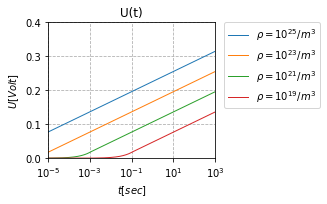

In [32]:
# Cathodic Electrode Voltage calculated for a range of ionic concentrations.
# Here it is assumed that the electrode is only an uinlimited source of electrons,
# resulting in a drop of ionic concentration to zero right at the electrode surface.
#
import matplotlib
import matplotlib.pyplot as plt
import math
from math import *
import numpy as np
#from math import log
#from math import sqrt
def Crank_Nicolson(cons,dy,dt,ny,nt,z,d,r,x1,y1,xmin,y2):



    ti = 0.
    N = 5001
    skip =0
    A = np.zeros([N])
    B = np.zeros([N])
    C = np.zeros([N])
    D = np.zeros([N])
    E = np.zeros([N])
    E_0 = np.zeros([N])
    F = np.zeros([N])
    G = np.zeros([N])
    H = np.zeros([N])
    I = np.zeros([N])
    y = np.zeros([N])
    x = np.zeros([N])
    t = np.zeros([N])
    BE = np.zeros([N])
    U = np.zeros([N])

    k=1.38e-23
    e=-1.602e-19
    T=300  
    eps0=8.85e-12
    eps=81*eps0
    #cons = 1e19
    x0=sqrt(2*k*T*eps/((z*e)**2)/cons)
    
    a = z*e*x0/k/T
    b = 1./dy**2
    m=2*dy*z*e*x0*cons/eps
    for n in range(1,nt):
        c =d*dt
        e1 = 2.*((dy*x0)**2)/c
        # Boundary Condition
        F[2] = E[2]+b*c*(E[3]-2*E[2]+E[1])/2/x0**2
        F[2] = F[2]-c*(1+a*E[2])*(E[3]-E[1])/4/dy/x0**2
        I[2] = e1
        H[2] = dy/2*(1+a*F[2])
        B[2] = -1+H[2]-I[2]
        C[2] = 1-H[2]
        BE[2] = B[2]
        D[2] = (1-H[2]-I[2])*E[2]+(-1+H[2])*E[3]+m*(1+H[2])
        G[2] = D[2]/B[2]
        
        for i in range(3,ny):
            f = 1./2./(x0*exp((i-1.5)*dy))**2
            F[i] = E[i]+b*c*f*(E[1+i]-2*E[i]+E[i-1])
            F[i] = F[i]-c*f*(1.+a*exp((i-1.5)*dy)*E[i])*(E[i+1]-E[i-1])/2/dy
            H[i] = dy/2.*(1.+a*exp((i-1.5)*dy)*F[i])
            I[i] = e1*exp(2.*(i-1.5)*dy)
            B[i] = -2.-I[i]
            C[i] = 1.-H[i]
            # The efficient L Thomas Tridiagonal matrix algorithm is used here
            A[i] =1.+H[i]
            D[i] = (-1.-H[i])*E[i-1]+(2.-I[i])*E[i]+(-1.+H[i])*E[i+1]
            BE[i] = B[i]-A[i]*C[i-1]/BE[i-1]
            G[i] = (D[i]-A[i]*G[i-1])/BE[i]    
        E[ny] = G[ny]

        for j in range ((ny-2),1,-1): 
            E[j] = G[j]-C[j]*E[j+1]/BE[j]
            U[n] = U[n]+E[j]*dy*x0*exp((j-1.5)*dy)
            x[j] = x0*((exp((j-1.5)*dy))-1.0)
            E_0[j] =-2*k*T/z/e/(x[j]+x0)# Here we calculate the field at t=inf
            #print ('%5d %010.3f'  %(j,E[j]))
            
        #fill out the array to avoid zero data elements
        E_0[ny]=E_0[ny-2]
        E_0[ny-1]=E_0[ny-2]
        x[ny]=x[ny-3]
        x[ny-1]=x[ny-3]
        x[ny-2]=x[ny-3]
    
        ti = ti+dt 
        t[n] = ti        

        #if n==(nt-1): 
            #print ('%010.3g'  %(ti*nt))
        dt = (1+r)*dt
        U[n] = U[n]+E[1]*dy*x0/2.+E[ny]*dy*x0*exp((ny-1.5)*dy) 
        #print(n,U[n])

    ti=0.
    for n in range(1,nt):
        ti = ti+dt   
        t[n]=ti
        dt = (1+r)*dt
        if U[n] > 0.018:
            if skip == 0:
                u0 = U[n]
                t0 = t[n]
                skip = 1
            U[n] = u0-k*T/z/e*log(t[n]/t0)   # Here we use the late time analytical expansion
            r=r*4            
    return(x,E,E_0,t,U)  


#    ax.plot(x, E_0, lw=2)



#Main Program
#fig, ax = plt.subplots(figsize=(7,6))
fig, ax2 = plt.subplots(figsize=(3,2.5))
#ax.grid(True, linestyle='dashed')
#ax.set_xlabel(r'$x(m)$')
#ax.set_ylabel(r'$E(Volt/m)$')
#ax.set_xlim([0, 3e-8])
#ax.set_ylim([0,1e7])
#ax.set_title('Electric Field Distribution');


ax2.grid(True, linestyle='dashed')
ax2.set_xlabel(r'$t[sec]$')
ax2.set_ylabel(r'$U[Volt]$')
ax2.set_xlim(1e-5, 1000.)
ax2.set_ylim([0,0.4])
ax2.set_title('U(t)');

(x,E,E_0,t,U)=Crank_Nicolson(cons=1e25,dy=1e-2,dt=0.5e-11,ny=500,nt=500,z=2,d=6e-10,r=0.005, x1=3e-9,y1=-3e8,xmin=1e-6,y2=0.3)   
ax2.semilogx(t,U, lw=1,label=r'$\rho=10^{25}/m^3$')
#ax.plot(x,E, lw=1)

(x,E,E_0,t,U)=Crank_Nicolson(cons=1e23,dy=1e-2,dt=0.5e-9,ny=500,nt=500,z=2,d=6e-10,r=0.005, x1=3e-7,y1=-3e6,xmin=1e-6,y2=-0.3)
ax2.semilogx(t,U, lw=1,label=r'$\rho=10^{23}/m^3$')
#ax.plot(x,E_0, lw=1)

(x,E,E_0,t,U)=Crank_Nicolson(cons= 1e21,dy=1e-2,dt=0.5e-7,ny=500,nt=500,z=2,d=6e-10,r=0.005, x1=-3e-5,y1=-3e4,xmin=1e-6,y2=-0.3)
ax2.semilogx(t,U, lw=1,label=r'$\rho=10^{21}/m^3$')
#ax.plot(x,E_0, lw=1)

(x,E,E_0,t,U)=Crank_Nicolson(cons=1e19,dy=1e-2,dt=0.5e-5,ny=500,nt=500,z=2,d=6e-10,r=0.005, x1=-3e-4,y1=-3e2,xmin=1e-6,y2=-0.3)
ax2.semilogx(t,U, lw=1,label=r'$\rho=10^{19}/m^3$')

ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig("cathodic.pdf", dpi=300, bbox_inches="tight") 
plt.show()   





/home/byn/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: RuntimeWarning: invalid value encountered in double_scalars


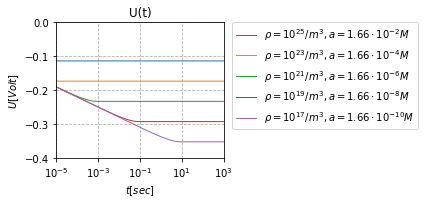

In [36]:
# Electrode voltage calculated for the case when an
# electrode (with x_a = 1e-10) is dipped into an electrolyte containing its ions,
# for a range of ionic concentrations
#
import matplotlib
import matplotlib.pyplot as plt
import math
from math import *
import numpy as np
#from math import log

#from math import sqrt
def Crank_Nicolson(cons,dy,dt,ny,nt,z,d,r,x1,y1,xmin,y2):



    ti = 0.
    N = 5001
    skip =0
    A = np.zeros([N])
    B = np.zeros([N])
    C = np.zeros([N])
    D = np.zeros([N])
    E = np.zeros([N])
    E_0 = np.zeros([N])
    F = np.zeros([N])
    G = np.zeros([N])
    H = np.zeros([N])
    I = np.zeros([N])
    y = np.zeros([N])
    x = np.zeros([N])
    t = np.zeros([N])
    BE = np.zeros([N])
    U = np.zeros([N])

    k=1.38e-23
    e=-1.602e-19
    T=300  
    eps0=8.85e-12
    eps=81*eps0
    #cons = 1e19
    x0=sqrt(2*k*T*eps/((z*e)**2)/cons)
    
    a = z*e*x0/k/T
    b = 1./dy**2
    m=2*dy*z*e*x0*cons/eps
    for n in range(1,nt):
        c =d*dt
        e1 = 2.*((dy*x0)**2)/c
        # Boundary Condition
        F[2] = E[2]+b*c*(E[3]-2*E[2]+E[1])/2/x0**2
        F[2] = F[2]-c*(1+a*E[2])*(E[3]-E[1])/4/dy/x0**2
        I[2] = e1
        H[2] = dy/2*(1+a*F[2])
        B[2] = -1+H[2]-I[2]
        C[2] = 1-H[2]
        BE[2] = B[2]
        D[2] = (1-H[2]-I[2])*E[2]+(-1+H[2])*E[3]+m*(1+H[2])
        G[2] = D[2]/B[2]
        
        for i in range(3,ny):
            f = 1./2./(x0*exp((i-1.5)*dy))**2
            F[i] = E[i]+b*c*f*(E[1+i]-2*E[i]+E[i-1])
            F[i] = F[i]-c*f*(1.+a*exp((i-1.5)*dy)*E[i])*(E[i+1]-E[i-1])/2/dy
            H[i] = dy/2.*(1.+a*exp((i-1.5)*dy)*F[i])
            I[i] = e1*exp(2.*(i-1.5)*dy)
            B[i] = -2.-I[i]
            C[i] = 1.-H[i]
            # The efficient L Thomas Tridiagonal matrix algorithm is used here
            A[i] =1.+H[i]
            D[i] = (-1.-H[i])*E[i-1]+(2.-I[i])*E[i]+(-1.+H[i])*E[i+1]
            BE[i] = B[i]-A[i]*C[i-1]/BE[i-1]
            G[i] = (D[i]-A[i]*G[i-1])/BE[i]    
        E[ny] = G[ny]

        for j in range ((ny-2),1,-1): 
            E[j] = G[j]-C[j]*E[j+1]/BE[j]
            U[n] = U[n]+E[j]*dy*x0*exp((j-1.5)*dy)
            x[j] = x0*((exp((j-1.5)*dy))-1.0)
            E_0[j] =-2*k*T/z/e/(x[j]+x0)# Here we calculate the field at t=inf
            #print ('%5d %010.3f'  %(j,E[j]))
            
        #fill out the array to avoid zero data elements
        E_0[ny]=E_0[ny-2]
        E_0[ny-1]=E_0[ny-2]
        x[ny]=x[ny-3]
        x[ny-1]=x[ny-3]
        x[ny-2]=x[ny-3]
    
        ti = ti+dt 
        t[n] = ti        

        #if n==(nt-1): 
            #print ('%010.3g'  %(ti*nt))
        dt = (1+r)*dt
        U[n] = U[n]+E[1]*dy*x0/2.+E[ny]*dy*x0*exp((ny-1.5)*dy) 
        #print(n,U[n])

    ti=0.
    for n in range(1,nt):
        ti = ti+dt   
        t[n]=ti
        dt = (1+r)*dt
        if U[n] > 0.015:
            if skip == 0:
                u0 = U[n]
                t0 = t[n]
                skip = 1
            U[n] = u0-k*T/z/e*log(t[n]/t0)   # Here we use the late time analytical expansion
            r=r*4 
        t[0]=1e-6
        t[1]=1e-5
        #print(t[n],U[n])  
        # this is where we add the anodic electrode voltage decay for x_a=1e-10
        U[n]=U[n]- 1.292e-2*log(t[n])-0.339

    return(x,E,E_0,t,U)  


#    ax.plot(x, E_0, lw=2)



#Main Program
#fig, ax = plt.subplots(figsize=(7,6))
fig, ax2 = plt.subplots(figsize=(3,2.5))
#ax.grid(True, linestyle='dashed')
#ax.set_xlabel(r'$x(m)$')
#ax.set_ylabel(r'$E(Volt/m)$')
#ax.set_xlim([0, 3e-8])
#ax.set_ylim([0,1e7])
#ax.set_title('Electric Field Distribution');


ax2.grid(True, linestyle='dashed')
ax2.set_xlabel(r'$t[sec]$')
ax2.set_ylabel(r'$U[Volt]$')
ax2.set_xlim(1e-5, 1000.)
ax2.set_ylim([-0.4,0.0])
ax2.set_title('U(t)');

(x,E,E_0,t,U)=Crank_Nicolson(cons=1e25,dy=1e-2,dt=0.5e-11,ny=500,nt=500,z=2,d=6e-10,r=0.005, x1=3e-9,y1=-3e8,xmin=1e-6,y2=0.3)   
ax2.semilogx(t,U, lw=1,label=r'$\rho=10^{25}/m^3, a=1.66\cdot 10^{-2} M$')

(x,E,E_0,t,U)=Crank_Nicolson(cons=1e23,dy=1e-2,dt=0.5e-9,ny=500,nt=500,z=2,d=6e-10,r=0.005, x1=3e-7,y1=-3e6,xmin=1e-6,y2=-0.3)
ax2.semilogx(t,U, lw=1,label=r'$\rho=10^{23}/m^3, a=1.66\cdot 10^{-4} M$')

(x,E,E_0,t,U)=Crank_Nicolson(cons= 1e21,dy=1e-2,dt=0.5e-7,ny=500,nt=500,z=2,d=6e-10,r=0.005, x1=-3e-5,y1=-3e4,xmin=1e-6,y2=-0.3)
ax2.semilogx(t,U, lw=1,label=r'$\rho=10^{21}/m^3, a=1.66\cdot 10^{-6} M$')
#ax.plot(x,E_0, lw=1)

(x,E,E_0,t,U)=Crank_Nicolson(cons=1e19,dy=1e-2,dt=0.5e-5,ny=500,nt=500,z=2,d=6e-10,r=0.005, x1=-3e-4,y1=-3e2,xmin=1e-6,y2=-0.3)
ax2.semilogx(t,U, lw=1,label=r'$\rho=10^{19}/m^3, a=1.66\cdot 10^{-8} M$')

(x,E,E_0,t,U)=Crank_Nicolson(cons=1e17,dy=1e-2,dt=0.5e-3,ny=500,nt=500,z=2,d=6e-10,r=0.005, x1=-3e-4,y1=-3e2,xmin=1e-6,y2=-0.3)
ax2.semilogx(t,U, lw=1,label=r'$\rho=10^{17}/m^3, a=1.66\cdot 10^{-10} M$')


ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig("electrode_voltage.pdf", dpi=300, bbox_inches="tight") 
plt.show()   





1.7228464419475658e-11 1.0753548634347823e-10
-1259682152.3020825 5.636723788250612e-10 -0.35502401767579395 1.0753548634347823e-10
-240317847.6979175
2.5842696629213487e-11 1.0753548634347823e-10
-759682152.3020825 3.399364237688814e-10 -0.12912181702730832 1.0753548634347823e-10
-240317847.6979175
5.168539325842697e-11 1.0753548634347823e-10
-259682152.3020825 1.1620046871270154e-10 -0.015087593906912567 1.0753548634347823e-10
-240317847.6979175


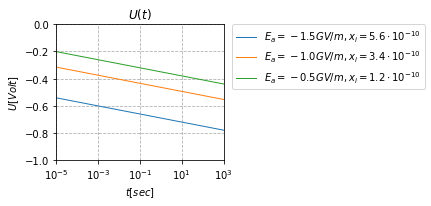

In [14]:
# Here we are assuming that the ionic concentration at the electrode surface is
# reaching a limiting density, due to lack of room.
# The parameter x0 is now set to a constant 1e-10.
# The electrode voltage is calculated for a range thicknesses of the saturated layer
# and the corresponding electric field at the electrode surface.

import math
from math import *
#from math import sqrt
import numpy as np
#from math import log
def Crank_Nicolson(E0,p_i,dy,dt,ny,nt,z,d,r,x1,y1,xmin,y2):


    #print(t_data)
    #print(V_data)

    k=1.38e-23
    e=1.602e-19
    T=300    
    Ui = 0.
    #Ei = 0.
    xi = 0.
    #x0=-2*k*T/z/e/E0
    eps0 = 8.85e-12
    eps = 81*eps0 # dielectric constant water 
    x0i = sqrt(2*k*T*eps/p_i/(z*e)**2)
    x0 = -2*k*T/z/e/E0
    dt_save = dt
    t0 = 0.
    U0 = 0.
    print(x0,x0i)
    if x0i>x0:
        x0=x0i
    ti = 0.
    N = 501
    skip =0
    Ei = np.zeros([N])
    x_i = np.zeros([N])
    A = np.zeros([N])
    B = np.zeros([N])
    C = np.zeros([N])
    D = np.zeros([N])
    E = np.zeros([N])
    E_0 = np.zeros([N])
    Ei_0 = np.zeros([N])
    F = np.zeros([N])
    G = np.zeros([N])
    H = np.zeros([N])
    I = np.zeros([N])
    y = np.zeros([N])
    x = np.zeros([N])
    t = np.zeros([N])
    BE = np.zeros([N])

    U = np.zeros([N])

    a = z*e*x0/k/T
    b = 1./dy**2
    E[1] = -2./a # This is the field at the end of the initial decay where p is constant
    
# Here we deal with the initial situation where the anion concentration p
# is saturated, or:  p = pi for 0<x<xi
    if E0<E[1]:   
        Ei[0] = E0-E[1]
        xi = -Ei[0]*eps/p_i/z/e
        #Ui = -p_i*z*e*(xi**2)/2/eps
        Ui = Ei[0]*xi/2
    print(Ei[0],xi,Ui,x0)
    print(E[1])
    
# Here we calulate the electric field beyond the saturated region
    for n in range(1,nt):
        c =d*dt
        e1 = 2.*(dy*x0)**2/c
        for i in range(2,ny):
            f = 1./2./(x0*exp((i-1)*dy))**2
            F[i] = E[i]+b*c*f*(E[1+i]-2*E[i]+E[i-1])
            F[i] = F[i]-c*f*(1.+a*exp((i-1)*dy)*E[i])*(E[i+1]-E[i-1])/2/dy
            H[i] = dy/2.*(1.+a*exp((i-1)*dy)*F[i])
            I[i] = e1*exp(2.*(i-1)*dy)
            B[i] = -2.-I[i]
            C[i] = 1.-H[i]
            # The efficient L Thomas Tridiagonal matrix algorithm is used here
            if i==2: #Initial Condition
                D[i] = (2.+2.*H[i])*2./a+(2.-I[i])*E[i]+(-1.+H[i])*E[i+1]
                BE[i] = B[i]
                G[i] = D[i]/B[i]

            if i>2:
                A[i] =1.+H[i]
                D[i] = (-1.-H[i])*E[i-1]+(2.-I[i])*E[i]+(-1.+H[i])*E[i+1]
                BE[i] = B[i]-A[i]*C[i-1]/BE[i-1]
                G[i] = (D[i]-A[i]*G[i-1])/BE[i]    
        E[ny] = G[ny]

        for j in range ((ny-2),1,-1): 
            E[j] = G[j]-C[j]*E[j+1]/BE[j]
            U[n] = U[n]+E[j]*dy*x0*exp((j-1)*dy)
            x[j] = x0*((exp((j-1)*dy))-1.0)
            E_0[j] =-2*k*T/z/e/(x[j]+x0)# Here we calculate the field at t=inf

        #fill out the array to avoid zero data elements
        E_0[ny]=E_0[ny-2]
        E_0[ny-1]=E_0[ny-2]
        x[ny]=x[ny-3]
        x[ny-1]=x[ny-3]
        x[ny-2]=x[ny-3]
    
        ti = ti+dt 
        t[n] = ti        

        #if n==(nt-1): 
            #print ('%010.3g'  %(ti*nt))
        dt = (1+r)*dt
        U[n] = U[n]+E[1]*dy*x0/2.+E[ny]*dy*x0*exp((ny-1)*dy)
        #if n==(nt-1):
        #print ('%10.3g %10.3g '  %(t[n],U[n]))
        #print(n,U[n])

    ti=0.
    dt = dt_save
    for n in range(1,nt): # Here we carry out the late time analytical expansion
   
        t[n]=ti
        ti = ti+dt  
        dt = (1+r)*dt
        if U[n] < -0.045:
            if skip == 0:
                U0 = U[n]
                t0 = t[n]
                skip = 1
            U[n] = U0-k*T/z/e*log(t[n]/t0)  
            r=r*1.5  
        #print ('%5d %010.3g  %010.3g'  %(n,t[n], U[n]))
    #print(t,U)       
    if xi>0.0: # Create new plot arrays Ei and x_i
        for n in range(1,nt): 
            U[n] =U[n]+Ui

        
            #with open('file.txt', 'a') as f:
                #print(x_i[n], Ei[n], file=f)
                #print(n, Ei[n], x_i[n], x_i[2])
    #y1=E0    
    return(t,U)   


fig, ax2 = plt.subplots(figsize=(3,2.5))
#fig, ax2 = plt.subplots()

ax2.grid(True, linestyle='dashed')
ax2.set_xlabel(r'$t[sec]$')
ax2.set_ylabel(r'$U[Volt]$')
ax2.set_xlim(0.00001, 1000.)
ax2.set_ylim([-1,-0])
ax2.set_title(r'$U(t)$');   #plt.show()            

p_i=5e27
(t,U) = Crank_Nicolson(-150e7,p_i,dy=1e-2,dt=1e-13,ny=500,nt=500,z=2,d=6e-10,r=0.005, x1=5e-5,y1=-5e7,xmin=0.1,y2=-0.85)
ax2.semilogx(t,U, lw=1, label='$E_a=-1.5GV/m, x_i=5.6 \cdot 10^{-10}$')

#(t,U) = Crank_Nicolson(-7e7,1e25,dy=1e-2,dt=1.5e-13,ny=500,nt=500,z=2,d=2e-9,r=0.014, x1=5e-8,y1=-5e7,xmin=0.1,y2=-0.85)
#ax2.semilogx(t,U, lw=1, label='$E_a=-70MV/m$')

(t,U) = Crank_Nicolson(-100e7,p_i,dy=1e-2,dt=1e-13,ny=500,nt=500,z=2,d=6e-10,r=0.005, x1=5e-8,y1=-5e7,xmin=0.1,y2=-0.85)
ax2.semilogx(t,U, lw=1, label='$E_a=-1.0GV/m, x_i=3.4 \cdot 10^{-10}$')

#(t,U) = Crank_Nicolson(-5e7,1e25,dy=1e-2,dt=1.5e-13,ny=500,nt=500,z=2,d=2e-9,r=0.016, x1=5e-8,y1=-5e7,xmin=0.1,y2=-0.85)
#ax2.semilogx(t,U, lw=1, label='$E_a=-50MV/m$')

(t,U) = Crank_Nicolson(-50e7,p_i,dy=1e-2,dt=1e-13,ny=500,nt=500,z=2,d=6e-10,r=0.005, x1=5e-8,y1=-5e7,xmin=0.1,y2=-0.85)
ax2.semilogx(t,U, lw=1, label='$E_a=-0.5GV/m, x_i=1.2 \cdot 10^{-10}$')

#(t,U) = Crank_Nicolson(-3e7,1e25,dy=1e-2,dt=1.5e-13,ny=500,nt=500,z=2,d=2e-9,r=0.016, x1=5e-8,y1=-5e7,xmin=0.1,y2=-0.85)
#ax2.semilogx(t,U, lw=1, label='$E_a=-30MV/m$')

#(t,U) = Crank_Nicolson(-20e7,p_i,dy=1e-2,dt=1.5e-13,ny=500,nt=500,z=2,d=2e-9,r=0.016, x1=5e-8,y1=-5e7,xmin=0.1,y2=-0.85)
#ax2.semilogx(t,U, lw=1, label='$E_a=-200MV/m$')

#(t,U) = Crank_Nicolson(-1e7,1e25,dy=1e-2,dt=1.5e-13,ny=500,nt=500,z=2,d=2e-9,r=0.016, x1=5e-8,y1=-5e7,xmin=0.1,y2=-0.85)
#ax2.semilogx(t,U, lw=1, label='$E_a=-10MV/m$')
#plt.legend()

ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig("numerical_saturated.pdf", dpi=300, bbox_inches="tight") 
plt.show() 

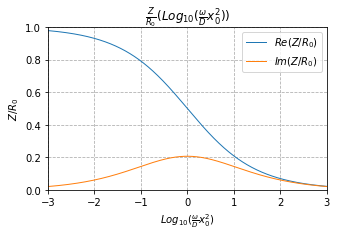

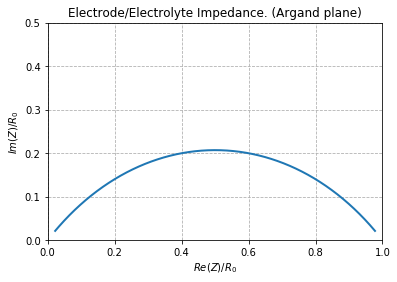

In [31]:
# Complex Impedance
import matplotlib
import matplotlib.pyplot as plt
import math
from math import *
import numpy as np


#R_0 = 5.0
#w_0 = 10.

def complex_re(log_omega):
    alpha = np.sqrt((10**log_omega)/2)
    return (alpha+1)/((alpha+1)**2+alpha**2)

def complex_im(log_omega):
    alpha = np.sqrt((10**log_omega)/2)
    return alpha/((alpha+1)**2+alpha**2)

log_omega = np.arange(-3,3, 0.001)

# The vectorize functions below is now probably not needed!
# Using np.sqrt instead of sqrt eliminates the problem!
vecfunc = np.vectorize(complex_re) 
re = vecfunc(log_omega)

vecfunc = np.vectorize(complex_im) 
im = vecfunc(log_omega)

fig, ax = plt.subplots(figsize=(5,3))


ax.grid(True, linestyle='dashed')
ax.set_xlabel(r'$Log_{10}({\frac{\omega}{D}}x_0^2)$')
ax.set_ylabel(r'$Z/R_0$')
ax.set_xlim([-3,3])
ax.set_ylim([0,1.])
ax.set_title(r'$\frac{Z}{R_0}(Log_{10}({\frac{\omega}{D}}x_0^2))$');

ax.plot(log_omega,re, lw=1, label=r'$Re(Z/R_0)$')
ax.plot(log_omega,im, lw=1, label=r'$Im(Z/R_0)$')
plt.legend()
#ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig("complex_impedance.pdf", dpi=300, bbox_inches="tight") 

fig, ax2 = plt.subplots()
ax2.grid(True, linestyle='dashed')
ax2.set_xlabel(r'$Re(Z)/R_0$')
ax2.set_ylabel(r'$Im(Z)/R_0$')
ax2.set_xlim([0,1])
ax2.set_ylim([0,0.5])
ax2.set_title('Electrode/Electrolyte Impedance. (Argand plane)');
ax2.plot(re,im, lw=2)

plt.show()

Measurement #:4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

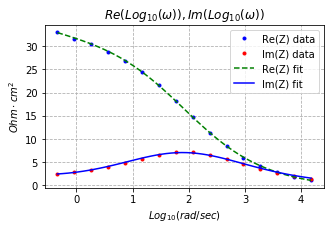

In [4]:
# Best fit of measured Impedance to theory.
# 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import display, Math

def complex_re(log_omega, R_0, w_0, k,R_e):
    omega=10**log_omega
    alpha = np.sqrt(omega/2/w_0)
    return R_0*(alpha+1)/((alpha+1)**2+alpha**2)+R_e+k/np.sqrt(omega)

def complex_im(log_omega, R_0, w_0, k):
    omega=10**log_omega
    alpha = np.sqrt(omega/2/w_0)
    return R_0*alpha/((alpha+1)**2+alpha**2)+k/np.sqrt(omega)

D=6e-10 #m^2/s
z=2
k=1.38e-23
T=300
e=1.602e-19
u=k*T/z/e

cell_area=pi*0.25 #cm^2
factor=3.0 #this factror needs to be applied when using 150 uA current!!
#factor=1.0 #applied this factor when using 50uA current!!

im_data = np.zeros((200,16))
im_data = np.load('measurements_im.npy')/factor/cell_area # loads your saved array into variable im_data.
re_data = np.zeros((200,16))
re_data = np.load('measurements_re.npy')/factor/cell_area # loads your saved array into variable re_data.

try:
    m = int(input('Measurement #:'))
except ValueError:
    print("Not an integer")
    stop()
    
if re_data[m][3] == 0.0:  
    b=0.866
    log_omega = np.linspace(b,4.177,12)
    s = slice(4,16,1)
    ydata_re = re_data[m][s]  

else:    
    if re_data[m][2] == 0.0:  
        b=0.565
        log_omega = np.linspace(b,4.177,13)
        s = slice(3,16,1)
        ydata_re = re_data[m][s]  
    else:
        if re_data[m][1] == 0.0: 
            b=0.264
            log_omega = np.linspace(b,4.177,14)
            s = slice(2,16,1)
            ydata_re = re_data[m][s]
        else:
            if re_data[m][0] == 0.0: 
                b=-0.037
                log_omega = np.linspace(b,4.177,15)
                s = slice(1,16,1)
                ydata_re = re_data[m][s]
            else:
                b=-0.338
                log_omega = np.linspace(b,4.177,16)
                s = slice(0,16,1)
                ydata_re = re_data[m][s]




#Fit for the parameters R_0, w_0, k, R_e of the function complex_re
popt_re, pcov_re = curve_fit(complex_re, log_omega, ydata_re,method='lm')
perr_1 = np.sqrt(np.diag(pcov_re))
#print(perr_1)
R_0_1=popt_re[0]
w_0_1=popt_re[1]
k1=popt_re[2]
R_e=popt_re[3] #Ohm



#display(Math(r'R_0: {}\Omega\\ \omega_0: {}D/x_0) \\ k: {}\Omega m^2'.format(round(R_0,0), round(w_0,0),round(k,0))))
display(Math(r'R_{01}: %4.1f \pm %4.1f\ \Omega/cm^2'%(R_0_1,perr_1[0])))
display(Math(r'\omega_{01}: %4.0f \pm %4.0f\ \frac{rad}{sec}'%(w_0_1, perr_1[1])))
display(Math(r'k_1: %4.1f \pm %4.1f\ \Omega/cm^2'%(k1, perr_1[2])))


fig, ax = plt.subplots(figsize=(5,3))
ax.grid(True, linestyle='dashed')
ax.set_xlabel(r'$Normalized Frequency, (Log_{10}(\sqrt{\frac{\omega}{2D}}x_0)$')
ax.set_ylabel(r'$Normalized Amplitude, (Z/R_0)$')
#ax.set_xlim([-3,3])
#ax.set_ylim([0,80.])
ax.set_title(r'$Re(Log_{10}(\omega)), Im(Log_{10}(\omega))$');
#ax.plot(log_omega, ydata_re, 'b.', label='Re(Z) data')

#ax.plot(log_omega,re, lw=1, label='Re(Z)')
#ax.plot(log_omega,im, lw=1, label='Im(Z)')



plt.plot(log_omega, ydata_re, 'b.', label='Re(Z) data')

ydata_im = im_data[m][s]
ax.plot(log_omega, ydata_im, 'r.', label='Im(Z) data')
#Fit for the parameters R_0, w_0, k, R_e of the function complex_im
popt_im, pcov_im = curve_fit(complex_im, log_omega, ydata_im,method='lm')
perr_2 = np.sqrt(np.diag(pcov_im))
#print(perr_2)
#print(np.diag(pcov_im))
R_0_2=popt_im[0]
w_0_2=popt_im[1]
k2=popt_im[2]
#R1_e=popt_im[3]
#popt_im[1]=popt_re[1] # w_0 determined based on Re(Z) is more accurate than Im(Z), so we use it for Im(Z)!

k=(k1+k2)/2 # Ohm
w_0=(w_0_1+w_0_2)/2
x0=sqrt(D/w_0)*1e6
R_0=(R_0_1+R_0_2)/2 # Ohm
R_0_sdev= np.sqrt(perr_1[0]**2+perr_2[0]**2)
w_0_sdev= np.sqrt(perr_1[1]**2+perr_2[1]**2)
k_sdev= np.sqrt(perr_1[2]**2+perr_2[2]**2)
x0_sdev=w_0_sdev/w_0/2*x0
#print(R_0_sdev)
I_0=u/R_0*1000 #mA/cm^2
I_0_sdev=R_0_sdev/R_0*I_0
#display(Math(r'R_0: {}\Omega\\ \omega_0: {}D/x_0) \\ k: {}\Omega m^2'.format(round(R_0,0), round(w_0,0),round(k,0))))
display(Math(r'R_{02}: %4.1f \pm %4.1f\ \Omega/cm^2'%(R_0_2,perr_2[0])))
display(Math(r'\omega_{02}: %4.0f \pm %4.0f\ \frac{rad}{sec}'%(w_0_2, perr_2[1])))
display(Math(r'k_2: %4.1f \pm %4.1f\ \Omega/cm^2'%(k2, perr_2[2])))


display(Math(r'R_0: %4.1f \pm %4.1f\ \Omega'%(R_0,R_0_sdev)))     
display(Math(r'\omega_0: %4.0f \pm %4.0f\ \frac{rad}{sec}'%(w_0,w_0_sdev)))
display(Math(r'k: %4.1f \pm %4.1f\ \Omega/cm^2'%(k, k_sdev)))
display(Math(r'x_0: %4.2f \pm %4.2f\ \mu m'%(x0,x0_sdev)))
display(Math(r'R_e: %4.1f \pm %4.1f\ \Omega/cm^2'%(R_e,perr_1[3])))
display(Math(r'I_0: %4.2f \pm %4.2f\ mA/cm^2'%(I_0,I_0_sdev)))
#display(Math(r'R_e: %4.2f (\Omega)'%-R1_e))

log_omega = np.linspace(b, 4.177, 50)

ax.plot(log_omega, complex_re(log_omega, *popt_re), 'g--', label='Re(Z) fit')
#popt_re[3]-=R_e # this subtracts R_e from the plotted Re(Z) best fit data!
ax.plot(log_omega, complex_im(log_omega, *popt_im), 'b-', label='Im(Z) fit')
#plt.xlabel(r'$Normalized Frequency, (Log_{10}(\omega \cdot x_0/D)$')
plt.xlabel(r'$Log_{10}(rad/sec)$')
plt.ylabel(r'$Ohm \cdot cm^2$')
plt.legend()
fig.savefig("complex_test.pdf", dpi=300, bbox_inches="tight") 
plt.show()

2.5842696629213487e-11 1.0753548634347823e-10
-759682152.3020825 3.399364237688814e-10 -0.12912181702730832 1.0753548634347823e-10
-240317847.6979175


/home/byn/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


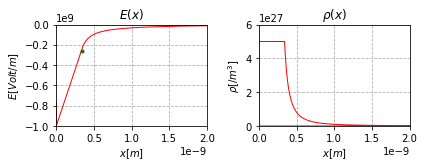

In [13]:
import math
from math import exp
from math import sqrt
import numpy as np
from math import log
import matplotlib.gridspec as gridspec

def Crank_Nicolson(E0,p_i,dy,dt,ny,nt,z,d,r,x1,y1,xmin,y2):

    k=1.38e-23
    e=1.602e-19
    T=300    
    Ui = 0.
    #Ei = 0.
    xi = 0.
    #x0=-2*k*T/z/e/E0
    eps0 = 8.85e-12
    eps = 81*eps0 # dielectric constant water 
    x0i = sqrt(2*k*T*eps/p_i/(z*e)**2)
    x0 = -2*k*T/z/e/E0
    dt_save = dt
    t0 = 0.
    U0 = 0.
    print(x0,x0i)
    if x0i>x0:
        x0=x0i
    ti = 0.
    N = 501
    skip =0
    Ei = np.zeros([N])
    x_i = np.zeros([N])
    A = np.zeros([N])
    B = np.zeros([N])
    C = np.zeros([N])
    D = np.zeros([N])
    E = np.zeros([N])
    E_0 = np.zeros([N])
    Ei_0 = np.zeros([N])
    F = np.zeros([N])
    G = np.zeros([N])
    H = np.zeros([N])
    I = np.zeros([N])
    y = np.zeros([N])
    x = np.zeros([N])
    t = np.zeros([N])
    BE = np.zeros([N])

    U = np.zeros([N])
    p = np.zeros([N])
    p_0 = np.zeros([N])             
    a = z*e*x0/k/T
    b = 1./dy**2
    E[1] = -2./a # This is the field at the end of the initial decay where p is constant
    
# Here we deal with the initial situation where the anion concentration p
# is saturated, or:  p = pi for 0<x<xi
    if E0<E[1]:   
        Ei[0] = E0-E[1]
        xi = -Ei[0]*eps/p_i/z/e
        #Ui = -p_i*z*e*(xi**2)/2/eps
        Ui = Ei[0]*xi/2
    print(Ei[0],xi,Ui,x0)
    print(E[1])
    
# Here we calulate the electric field beyond the saturated region
    for n in range(1,nt):
        c =d*dt
        e1 = 2.*(dy*x0)**2/c
        for i in range(2,ny):
            f = 1./2./(x0*exp((i-1)*dy))**2
            F[i] = E[i]+b*c*f*(E[1+i]-2*E[i]+E[i-1])
            F[i] = F[i]-c*f*(1.+a*exp((i-1)*dy)*E[i])*(E[i+1]-E[i-1])/2/dy
            H[i] = dy/2.*(1.+a*exp((i-1)*dy)*F[i])
            I[i] = e1*exp(2.*(i-1)*dy)
            B[i] = -2.-I[i]
            C[i] = 1.-H[i]
            # The efficient L Thomas Tridiagonal matrix algorithm is used here
            if i==2: #Initial Condition
                D[i] = (2.+2.*H[i])*2./a+(2.-I[i])*E[i]+(-1.+H[i])*E[i+1]
                BE[i] = B[i]
                G[i] = D[i]/B[i]

            if i>2:
                A[i] =1.+H[i]
                D[i] = (-1.-H[i])*E[i-1]+(2.-I[i])*E[i]+(-1.+H[i])*E[i+1]
                BE[i] = B[i]-A[i]*C[i-1]/BE[i-1]
                G[i] = (D[i]-A[i]*G[i-1])/BE[i]    
        E[ny] = G[ny]

        for j in range ((ny-2),1,-1): 
            E[j] = G[j]-C[j]*E[j+1]/BE[j]
            x[j] = x0*((exp((j-1)*dy))-1.0)
            E_0[j] =-2*k*T/z/e/(x[j]+x0)# Here we calculate the field at t=inf
            p_0[j] = eps*2*k*T/(z*e)**2/(x[j]+x0)**2     
            #print ('%10d, %10.3g,  %10.3g '  %(j,x[j],E[j]))
        #fill out the array to avoid zero data elements
        E_0[ny]=E_0[ny-2]
        E_0[ny-1]=E_0[ny-2]
        x[ny]=x[ny-3]
        x[ny-1]=x[ny-3]
        x[ny-2]=x[ny-3]

        ti = ti+dt 
        t[n] = ti        

        #if n==(nt-1): 
            #print ('%010.3g'  %(ti*nt))
        dt = (1+r)*dt


    if xi>0.0: # Create new plot arrays Ei and x_i
        for i in range(1,ny): 
            if x[i]<xi:
                Ei[i]=E[1]+Ei[0]*(1-x[i]/xi)

                p[i]=p_i
                x_i[i]=x[i]
                #print(n,x[n],Ei[n])
                m=i
            else:
                Ei[i]=E[i-m]
                p[i]=p_0[i-m]
                Ei_0[i]= E_0[i-m]
                x_i[i]=x[i-m]+xi
            #with open('file.txt', 'a') as f:
                #print(x_i[n], Ei[n], file=f)
                #print(n, Ei[n], x_i[n], x_i[2])
            #if i == ny-2:
            #print ('%10d, %10.3g,  %10.3g %10.3g'  %(i,x_i[i],p[i], Ei[i])) 
    #print(x_i,Ei) 
    #print ('%10.3g'  %(t[498]))
    p[0]=p_i
    p[144]=p_i # inserting missing data element!
  
    y1=E0
    #Ei.tolist
    #Ei_0.tolist
    #x_i.tolist
    #fig = plt.figure(figsize=(5,2.5),tight_layout=True)
    fig = plt.figure(tight_layout=True)
    gs = gridspec.GridSpec(2, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    
   
    #fig, ax = plt.subplots(figsize=(3,3))
 
    ax1.grid(True, linestyle='dashed')
    ax1.set_xlabel(r'$x[m]$')
    ax1.set_ylabel(r'$E[Volt/m]$')
    ax1.set_xlim([0, x1])
    ax1.set_ylim([y1,0])
    ax1.set_title(r'$E(x)$');
    ax1.plot(x_i,Ei, 'r', lw=1, label=r'$E_a=1GV/m$')
    #ax1.plot(x_i, Ei_0, lw=1, label='$x_a=1 \cdot 10^{-10}m$')
    #ax1.plot([xi, xi], [0, -10e8], color='black', lw=1, label='$x_i=3.4 \cdot 10^{-10}m$')
    ax1.plot(xi,-0.258e9, 'g.')
    #ax1.legend()        
                                  
    ax2.grid(True, linestyle='dashed')
    ax2.set_xlabel(r'$x[m]$')
    ax2.set_ylabel(r'$\rho[/m^3]$')
    ax2.set_xlim([0, x1])
    ax2.set_ylim([0,6e27])
    ax2.set_title(r'$\rho(x)$');
    #ax2.plot(x_i,Ei, lw=1, label='$E_a=1GV/m$')
    ax2.plot(x_i, p, 'r', lw=1, label='$x_a=1 \cdot 10^{-10}m$')
    #ax2.plot([xi, xi], [0, 6e27], color='black', lw=1, label='$x_i=3.4 \cdot 10^{-10}m$')
    #ax2.plot(xi,5e26, 'r.')
    #ax2.legend()                                  
    fig.savefig("saturated.pdf", dpi=300, bbox_inches="tight")             
    plt.show()            


    
Crank_Nicolson(-100e7,5e27,dy=1e-2,dt=1e-13,ny=500,nt=500,z=2,d=2e-9,r=0.009, x1=2e-9,y1=-5e7,xmin=0.1,y2=-1)   
#Crank_Nicolson(x0=1e-9,dy=1e-2,dt=1e-11,ny=500,nt=500,z=2,d=2e-9,r=0.008, x1=3e-8,y1=-3e7,xmin=1e-6,y2=0.3)
#Crank_Nicolson(x0=1e-8,dy=1e-2,dt=1e-9,ny=500,nt=500,z=2,d=2e-9,r=0.008, x1=3e-7,y1=-3e6,xmin=1e-6,y2=-0.3)
#Crank_Nicolson(x0=1e-7,dy=1e-2,dt=1e-7,ny=500,nt=500,z=2,d=2e-9,r=0.008, x1=3e-6,y1=-3e5,xmin=1e-6,y2=-0.3)
#Crank_Nicolson(x0=1e-6,dy=1e-2,dt=1e-5,ny=500,nt=500,z=2,d=2e-9,r=0.008, x1=3e-5,y1=-3e4,xmin=1e-6,y2=-0.3)
#Crank_Nicolson(x0=1e-5,dy=1e-2,dt=1e-3,ny=500,nt=500,z=2,d=2e-9,r=0.008, x1=3e-4,y1=-3e3,xmin=1e-6,y2=-0.3)

/home/byn/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<function matplotlib.pyplot.show(*args, **kw)>

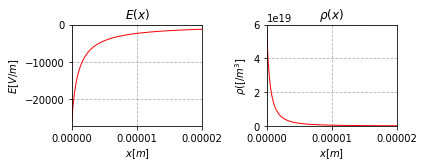

In [8]:
# Plot the anodic case E-field and ionic density
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

k=1.38e-23
e=1.602e-19
z=2
T=300
eps0=8.85e-12
eps=81*eps0
x_0=1e-6 # micro m

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#fig, ax = plt.subplots(figsize=(3,2.5))
x = np.linspace(0, 20e-6, 100)
y = -2*k*T/z/e/((x+x_0))
p = eps*2*k*T/(z*e)**2/(x+x_0)**2
#return '%1.0f $x_0$' % (x)
#
#formatter = FuncFormatter(x_labels)
#ax.xaxis.set_major_formatter(formatter)

ax1.grid(True, linestyle='dashed')
ax1.set_xlabel(r'$x[m]$')
ax1.set_ylabel(r'$E[V/m]$')
ax1.set_xlim([0, 20e-6])
#ax1.set_ylim([-2.5e4,0])
ax1.plot(x, y,'r', lw=1, label=r'$x_a=1\mu m$')

ax1.set_title('$E(x)$')

ax2.grid(True, linestyle='dashed')
ax2.set_xlabel(r'$x[m]$')
ax2.set_ylabel(r'$\rho([/m^3]$')
ax2.set_xlim([0, 20e-6])
ax2.set_ylim([0,6e19])
ax2.plot(x, p, 'r',lw=1)

ax2.set_title(r'$\rho(x)$')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend()
fig.savefig("anodic_electric_field.pdf", dpi=300, bbox_inches="tight")            
plt.show

3.0986065186300935e-09


/home/byn/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


<function matplotlib.pyplot.show(*args, **kw)>

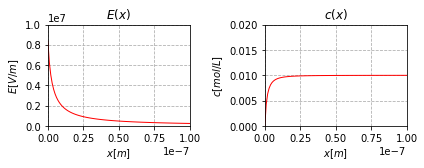

In [9]:
# Plot the cathodic case E-field and ionic density
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

k=1.38e-23
e=1.602e-19
z=2
T=300
eps0=8.85e-12
eps=81*eps0
avogadro=6.022e26
conc=0.01 # molarity
p1=conc*avogadro
x0=sqrt(eps*2*k*T/p1)/z/e
print(x0)
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#fig, ax = plt.subplots(figsize=(3,2.5))
x = np.linspace(0, 1e-7, 100)
y = 2*k*T/z/e/(x+x0)
p = (p1-eps*2*k*T/(z*e)**2/(x+x0)**2)/avogadro

#return '%1.0f $x_0$' % (x)
#
#formatter = FuncFormatter(x_labels)
#ax.xaxis.set_major_formatter(formatter)

ax1.grid(True, linestyle='dashed')
ax1.set_xlabel(r'$x[m]$')
ax1.set_ylabel(r'$E[V/m]$')
ax1.set_ylim([0, 1e7])
ax1.set_xlim([0, 1e-7])
#ax1.set_ylim([-2.5e4,0])
ax1.plot(x, y, 'r',lw=1, label=r'$x_a=1\mu m$')

ax1.set_title('$E(x)$')

ax2.grid(True, linestyle='dashed')
ax2.set_xlabel(r'$x[m]$')
ax2.set_ylabel(r'$c[mol/L]$')
ax2.set_xlim([0, 1e-7])
ax2.set_ylim([0,0.02])
ax2.plot(x, p, 'r', lw=1)

ax2.set_title(r'$c(x)$')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend()
fig.savefig("cathodic_electric_field.pdf", dpi=300, bbox_inches="tight")            
plt.show